## Question 3: Data Mining the Bible

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from wordcloud import WordCloud
import time

In [161]:
bibleoriginal = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/bible_asv.csv")
bibleoriginal.head()

,Unnamed: 0,field,Testaments,Sections,Books,Chapters,Verses,text
0,1,1001001,OT,Law,gen,gen_1,gen_1:1,In the beginning God created the heavens and t...
1,2,1001002,OT,Law,gen,gen_1,gen_1:2,And the earth was waste and void; and darkness...
2,3,1001003,OT,Law,gen,gen_1,gen_1:3,"And God said, Let there be light: and there wa..."
3,4,1001004,OT,Law,gen,gen_1,gen_1:4,"And God saw the light, that it was good: and G..."
4,5,1001005,OT,Law,gen,gen_1,gen_1:5,"And God called the light Day, and the darkness..."


## Data Preprocessing

In [162]:
bible = bibleoriginal
#drop features that are not text or book
bible = bible.drop(['field','Testaments','Sections','Chapters','Verses'], axis=1)
bible['text'] = bible['text'].str.lower()
bible['text'] = bible['text'].str.replace('[^\w\s]','')
bible['text'] = bible['text'].str.replace('\d+', '')
bible['text'] = bible['text'].str.strip()
biblebooks = bible.groupby('Books').agg(' '.join)
#tf-idf
#first we create vector using only 500 words and removing useless stop words
#we just consider words that matter to the target variable (salary)
vector = TfidfVectorizer(stop_words='english', max_features=500)
data = pd.DataFrame(vector.fit_transform(biblebooks.text).toarray(), columns = vector.get_feature_names())
#print(biblebooks.shape)
#print(bibleVectorized.shape)
data.head()
#biblebooks = pd.concat([biblebooks['Books'], bibleVectorized], axis=1)
#print(biblebooks.shape)
#biblebooks = biblebooks.drop('text', axis=1)
#print (biblebooks.shape)
#print (data.shape)
#print(biblebooks['text'][0])

,aaron,able,abraham,according,afraid,altar,angel,anger,answer,answered,...,world,wrath,written,wrought,ye,yea,year,years,young,zion
0,0.043582,0.012484,0.010121,0.035697,0.004998,0.019142,0.018939,0.001694,0.001847,0.005169,...,0.001847,0.00156,0.006776,0.004916,0.020405,0.002474,0.003693,0.017165,0.004998,0.002237
1,0.000000,0.021764,0.000000,0.021337,0.000000,0.016018,0.000000,0.000000,0.000000,0.000000,...,0.133924,0.00000,0.056706,0.004571,0.418524,0.024153,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.008812,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.280790,0.00000,0.070255,0.000000,0.257185,0.008550,0.000000,0.000000,0.023030,0.000000
3,0.000000,0.002678,0.001737,0.041571,0.001430,0.055846,0.005417,0.014537,0.007923,0.031047,...,0.000000,0.00000,0.020351,0.011249,0.017510,0.002123,0.044367,0.034814,0.012866,0.001919
4,0.000000,0.000000,0.017927,0.112911,0.000000,0.000000,0.018637,0.000000,0.016354,0.000000,...,0.032709,0.00000,0.030007,0.014513,0.510268,0.010955,0.000000,0.000000,0.000000,0.019811


## Preliminary Visualization

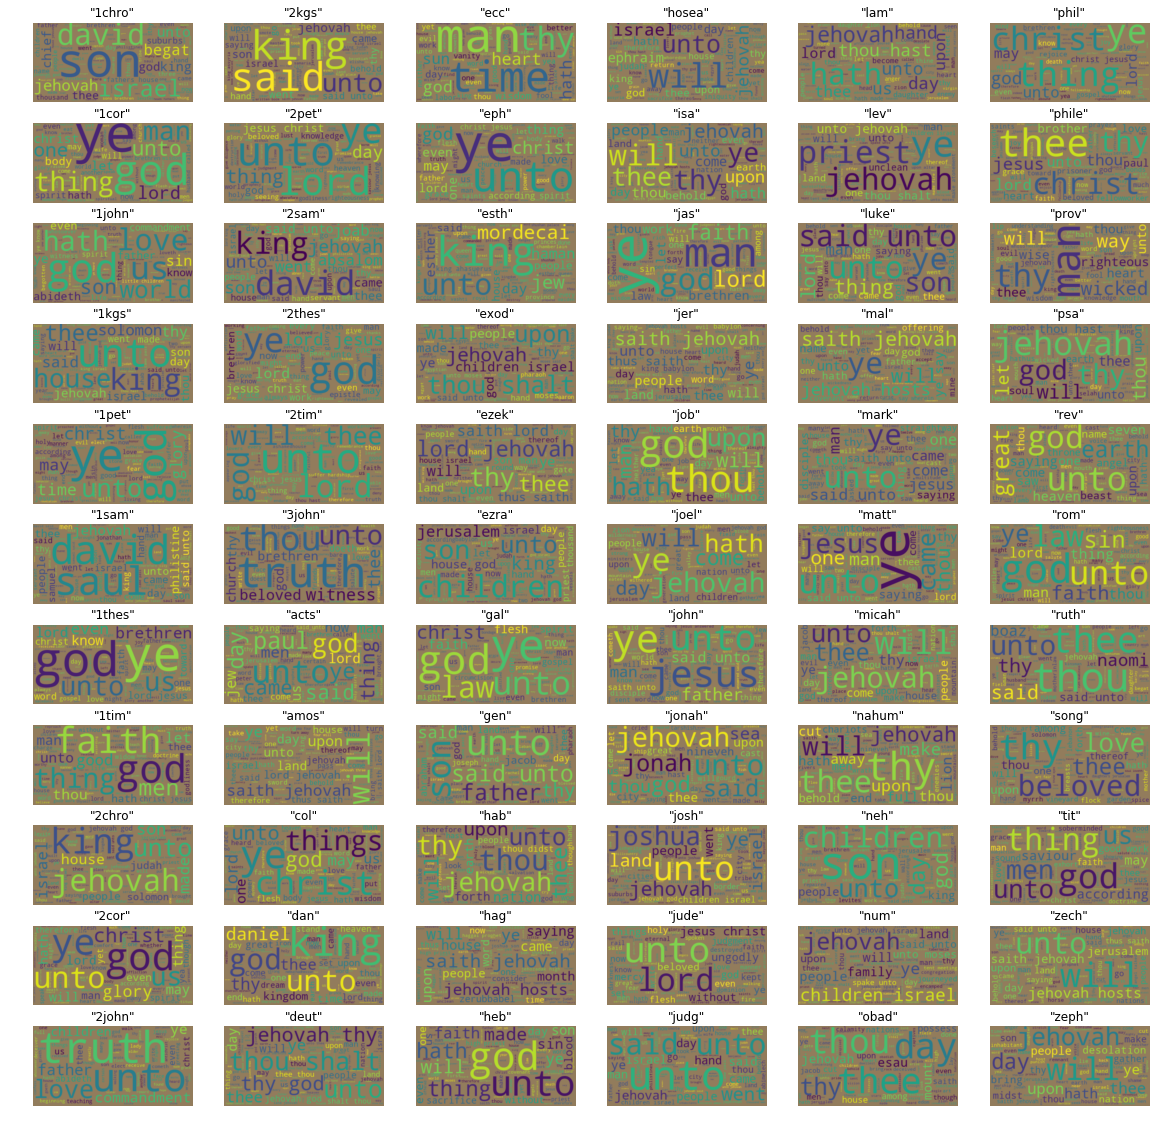

In [163]:
f, ax = plt.subplots(11, 6, figsize=(20, 20))
for a in range(11):
    for b in range(6):
        wordcloud = WordCloud(max_words=100,background_color="#927c5c").generate(biblebooks['text'][b*11+a])
        ax[a,b].set(title='k-means Clustering')
        ax[a,b].imshow(wordcloud, interpolation='bilinear')
        ax[a,b].set(title='\"' + biblebooks.axes[0][b*11+a] + '\"')
        ax[a,b].axis("off")
plt.show()

In [164]:
# first find optimal number of clusters using silhouette scores
silhouetteScores = []
for numClusters in range(3,50):
    kmeans = KMeans(n_clusters=numClusters, random_state=int(time.time()))
    pred = kmeans.fit_predict(data)
    silhouetteScores.append([silhouette_score(data, pred),numClusters])
optimal = sorted(silhouetteScores)[-1][1]
print ("The optimal number of clusters according to silhouette scores is", optimal)

The optimal number of clusters according to silhouette scores is 3


In [ ]:
#preprocess categorical features
#salary = pd.get_dummies(salary, columns=['Title', 'LocationNormalized', 'ContractTime', 'ContractType', 'Company', 'Category'], prefix=['Title', 'LocationNormalized', 'ContractTime', 'ContractType', 'Company', 'Category'])
salary = pd.get_dummies(salary, columns=['LocationNormalized', 'ContractTime', 'ContractType'], prefix=['LocationNormalized', 'ContractTime', 'ContractType'])
print (salary.shape)

## Training and Testing Models

In [ ]:
#split dataset into training and testing 80% 20%
X = salary.drop('SalaryNormalized', axis=1)
Y = salary.SalaryNormalized
pca = PCA(n_components=1000)
pca.fit(X)
X = pca.transform(X)
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, random_state=int(time.time()), test_size=0.20)

## Linear Regression

In [ ]:
lr = LinearRegression().fit(xTrain, yTrain)

#print("lr.coef_:", lr.coef_)
#print("lr.intercept_:", lr.intercept_)

print("Training set score: {:.2f}".format(lr.score(xTrain, yTrain)))
print("Test set score: {:.2f}".format(lr.score(xTest, yTest)))

## Ridge Regression

In [ ]:
ridge = Ridge().fit(xTrain, yTrain)
print("Training set score: {:.2f}".format(ridge.score(xTrain, yTrain)))
print("Test set score: {:.2f}".format(ridge.score(xTest, yTest)))

## Decision Trees

In [ ]:
tree1 = DecisionTreeRegressor(max_depth=5).fit(xTrain, yTrain)
tree2 = DecisionTreeRegressor(max_depth=10).fit(xTrain, yTrain)
print ("Tree of depth 5 Training set score: {:.2f}".format(tree1.score(xTrain, yTrain)))
print ("Tree of depth 5 Test set score: {:.2f}".format(tree1.score(xTest, yTest)))
print ("Tree of depth 10 Training set score: {:.2f}".format(tree2.score(xTrain, yTrain)))
print ("Tree of depth 10 Test set score: {:.2f}".format(tree2.score(xTest, yTest)))
#higher depth means overfitting to the training data and lower accuracy on the testing data

## K-Nearest Neighbors

In [ ]:
for n in range(2,12):
    # this loop tries number of neighbors from 2 to 11
    knn = KNeighborsRegressor(n_neighbors=n)
    # KNN with 6 neighbors was found to be the most accurate in general
    knn.fit(xTrain, yTrain)
    print ("Training set score with " + str(n) + " neighbors: {:.2f}".format(knn.score(xTrain, yTrain)))
    print ("Test set score with " + str(n) + " neighbors: {:.2f}".format(knn.score(xTest, yTest)))

## Gradient Boosted Regression

In [ ]:
gbr = GradientBoostingRegressor()
gbr.fit(xTrain, yTrain)
print("Training set score: {:.3f}".format(gbr.score(xTrain, yTrain)))
print("Test set score: {:.3f}".format(gbr.score(xTest, yTest)))

## Conclusions